In [1]:
! pip install sweetviz

     |████████████████████████████████| 15.1 MB 10.5 MB/s 


In [2]:
import gc
import pickle
import seaborn as sns
from matplotlib import pyplot as plt
import sweetviz as sv
from pandas_profiling import ProfileReport

In [3]:
with open("../input/workation-price-prediction-preprocess-data/Workation_Dataset.txt", 'rb') as handle: 
    data = handle.read()

processed_data = pickle.loads(data)
train_df = processed_data['train_df']
test_df = processed_data['test_df']

del processed_data
gc.collect()

0

In [4]:
train_df = train_df[[
    "Flight Stops"
    ,"Meals"
    ,"Destination_Count"
    ,"total_days"
    ,"travel_date_year"
    ,"travel_date_quarter"
    ,"travel_date_month"
    ,"travel_date_week"
    ,"travel_date_day_year"
    ,"travel_date_day_month"
    ,"travel_date_day_week"
    ,"travel_date_day_weekend"
    ,"total_hotels"
    ,"Airline_Count"
    ,"Sightseeing_Count"
    ,"Per Person Price"
]].copy()

In [5]:
test_df = test_df[[
    "Flight Stops"
    ,"Meals"
    ,"Destination_Count"
    ,"total_days"
    ,"travel_date_year"
    ,"travel_date_quarter"
    ,"travel_date_month"
    ,"travel_date_week"
    ,"travel_date_day_year"
    ,"travel_date_day_month"
    ,"travel_date_day_week"
    ,"travel_date_day_weekend"
    ,"total_hotels"
    ,"Airline_Count"
    ,"Sightseeing_Count"
]].copy()

In [6]:
report_comp=sv.compare([train_df,'TRAIN'],[test_df,'TEST']) 
report_comp.show_html('Sweetviz_Compare_Report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report Sweetviz_Compare_Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [7]:
design_report = ProfileReport(train_df, title='Pandas Profiling Report', explorative=True)
design_report.to_file(output_file='Pandas_Profiling_Report.html')

Summarize dataset:   0%|          | 0/31 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

/opt/conda/lib/python3.7/site-packages/pandas_profiling/visualisation/plot.py:154: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("RdBu"))
  cmap.set_bad(cmap_bad)


Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

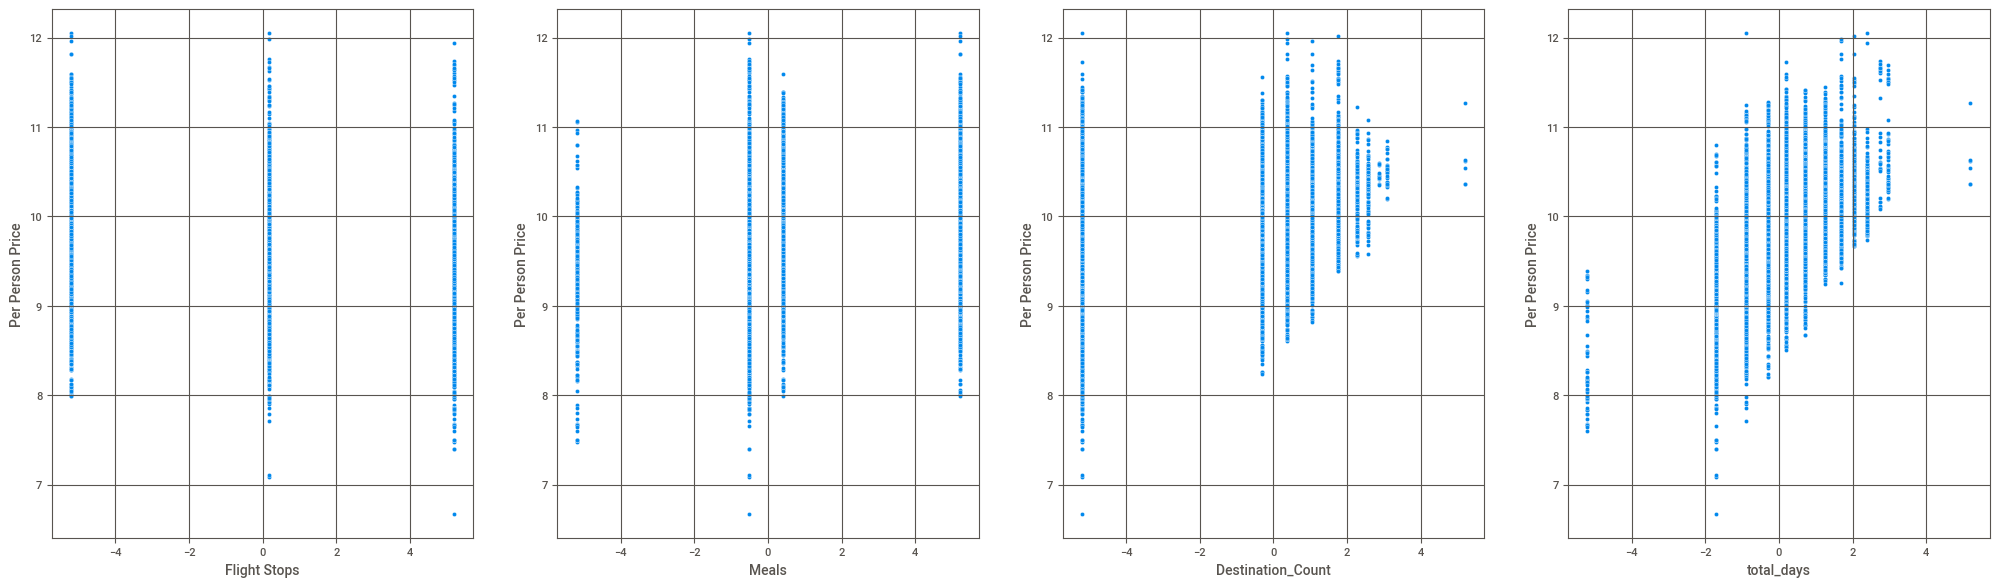

In [8]:
_, ax = plt.subplots(1, 4, figsize=(25, 7))
sns.scatterplot(x="Flight Stops", y="Per Person Price", data=train_df, ax=ax[0]); ax[0].grid();
sns.scatterplot(x="Meals", y="Per Person Price", data=train_df, ax=ax[1]); ax[1].grid();
sns.scatterplot(x="Destination_Count", y="Per Person Price", data=train_df, ax=ax[2]); ax[2].grid();
sns.scatterplot(x="total_days", y="Per Person Price", data=train_df, ax=ax[3]); ax[3].grid();

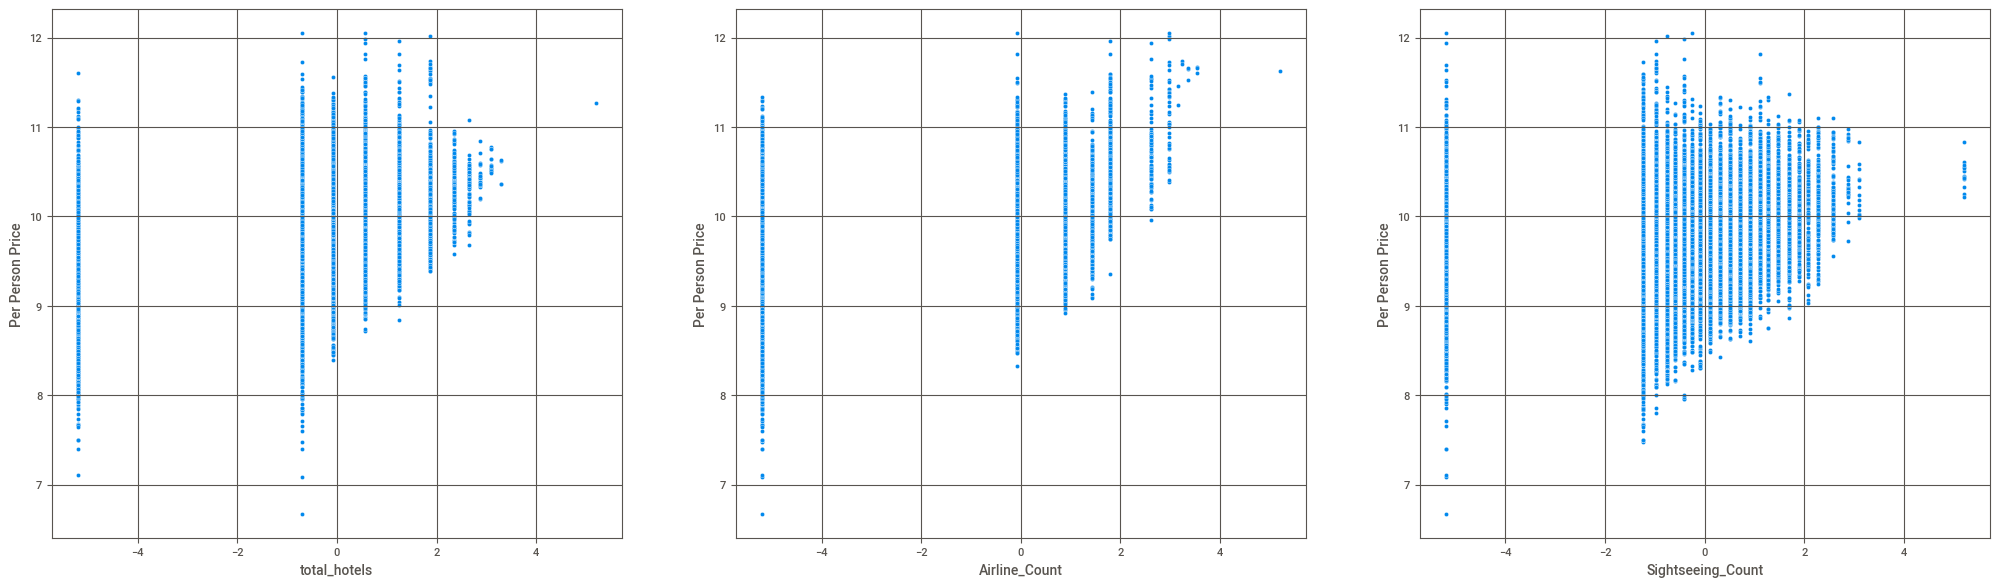

In [9]:
_, ax = plt.subplots(1, 3, figsize=(25, 7))
sns.scatterplot(x="total_hotels", y="Per Person Price", data=train_df, ax=ax[0]); ax[0].grid();
sns.scatterplot(x="Airline_Count", y="Per Person Price", data=train_df, ax=ax[1]); ax[1].grid();
sns.scatterplot(x="Sightseeing_Count", y="Per Person Price", data=train_df, ax=ax[2]); ax[2].grid();